In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

car = imread('resources/auto.jpg')

plt.imshow(car)

In [2]:
def get_region_index(color_value):
    # colors divided into 8 regions for each color space
    eight_regions = [[0,31], [32,63], [64,95], [96,127], [128,159], [160,191], [192,223], [224,255]]
    for index, region_value in enumerate(eight_regions):
        if color_value >= region_value[0] and  color_value <= region_value[1]:
            return index

        
r_region_mappings = [[],[],[],[],[],[],[],[]]
g_region_mappings = [[],[],[],[],[],[],[],[]]
b_region_mappings = [[],[],[],[],[],[],[],[]]    

# loop through all pixels and the put the colors into the respective color regions
for rows in car:
    for pixel in rows:
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        #find the index where the color is supposed to go and add it
        r_region_mappings[get_region_index(red)].append(red)
        g_region_mappings[get_region_index(green)].append(green)
        b_region_mappings[get_region_index(blue)].append(blue)
        
# find the color that represents each region
r_representative_color_per_region = [0,0,0,0,0,0,0,0]
g_representative_color_per_region = [0,0,0,0,0,0,0,0]
b_representative_color_per_region = [0,0,0,0,0,0,0,0]

In [3]:
# find the average of all colors in the regions to find the representative color
for index in range(8):
    r_representative_color_per_region[index] = np.mean(r_region_mappings[index]).astype(int)
    g_representative_color_per_region[index] = np.mean(g_region_mappings[index]).astype(int)
    b_representative_color_per_region[index] = np.mean(b_region_mappings[index]).astype(int)

In [4]:
# now replace all colors in the image with their uniform quantized representative colors
new_car = np.copy(car)
for rindex, rows in enumerate(car):
    for cindex, pixel in enumerate(rows):
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        new_car[rindex, cindex][0] = r_representative_color_per_region[get_region_index(red)]
        new_car[rindex, cindex][1] = g_representative_color_per_region[get_region_index(green)]
        new_car[rindex, cindex][2] = b_representative_color_per_region[get_region_index(blue)]
         

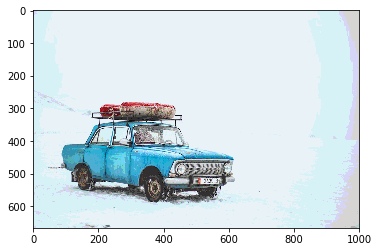

In [5]:
plt.imshow(new_car)

In [6]:
from skimage.io import imsave

imsave('uniform_quantized.jpg', new_car)